# OPEN ENDED LAB
Subject: **MACHINE LEARNING**\
Name: **Romaz Naveed**\
Roll no: **22F-BSAI-52**\
Topic:  **House Price & Category Prediction**


In [60]:
# here i'm Importing required libraries for data handling and ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report


In [65]:
# now i have loaded training and testing datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)

# View first 5 rows
train.head()


Training data shape: (1460, 81)
Testing data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
# Selecting all the key numeric features related to price
selected_features = ['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
target = 'SalePrice'

# Created a smaller, cleaner dataframe of related features
data = train[selected_features + [target]].copy()
data.head()


,LotArea,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,SalePrice
0,8450,7,1710,2,856,2,208500
1,9600,6,1262,2,1262,2,181500
2,11250,7,1786,2,920,2,223500
3,9550,7,1717,3,756,1,140000
4,14260,8,2198,3,1145,2,250000


In [67]:
# now im Checking missing values
print(data.isnull().sum())

# Filling the missing values with mean
data = data.fillna(data.mean())


LotArea        0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
SalePrice      0
dtype: int64


In [82]:
# Removing extreme outliers from SalePrice using IQR (Interquartile Range)
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data = data[(data['SalePrice'] >= lower_limit) & (data['SalePrice'] <= upper_limit)]
print("After removing outliers:", data.shape)


After removing outliers: (1366, 8)


In [84]:
# Scale numeric features using standard scalar so that all have similar importance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[selected_features])

y = data[target]

In [93]:
# Split the dataset for training and validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (1092, 6)
Testing data shape: (274, 6)


In [86]:
# Train Linear Regression model for continuous price prediction
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 2))


Linear Regression Results:
R² Score: 0.704
RMSE: 29532.1


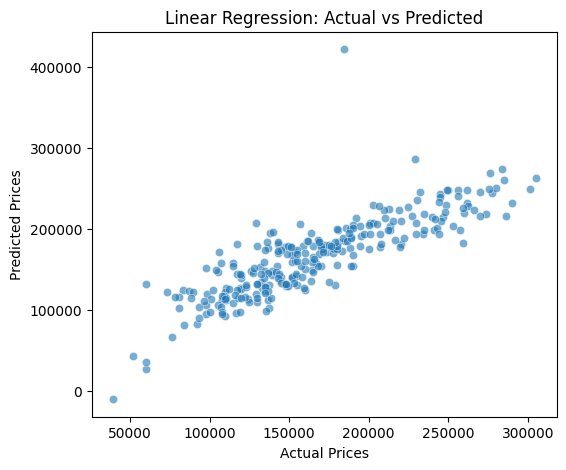

In [87]:
# Ploted Actual vs Predicted Prices taking predicted price in y-axis and actual price n x-axis
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [90]:
# Divide SalePrice into three categories of low medium and high for classification
bins = [0, y.quantile(0.33), y.quantile(0.66), y.max()]
labels = ['Low', 'Medium', 'High']
data['PriceCategory'] = pd.cut(data['SalePrice'], bins=bins, labels=labels, include_lowest=True)

data[['SalePrice', 'PriceCategory']].head()

,SalePrice,PriceCategory
0,208500,High
1,181500,High
2,223500,High
3,140000,Medium
4,250000,High


In [91]:
# Prepare classification data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_scaled, data['PriceCategory'], test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(Xc_train, yc_train)

# Predict categories
yc_pred = rf_model.predict(Xc_test)

# Evaluate
acc = accuracy_score(yc_test, yc_pred)
print("Random Forest Accuracy:", round(acc, 3))
print("\nClassification Report:\n", classification_report(yc_test, yc_pred))


Random Forest Accuracy: 0.755

Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.84      0.86        93
         Low       0.76      0.76      0.76        92
      Medium       0.63      0.66      0.65        89

    accuracy                           0.76       274
   macro avg       0.76      0.75      0.76       274
weighted avg       0.76      0.76      0.76       274



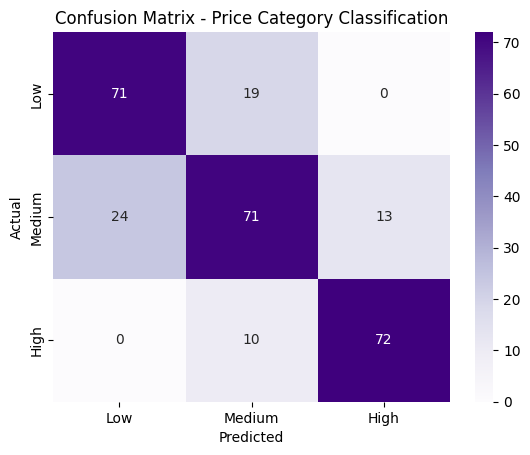

In [81]:
# Show confusion matrix of predicted and actual price category classification
cm = confusion_matrix(yc_test, yc_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Price Category Classification')
plt.show()

# Conclusion
-Linear Regression successfully predicted house prices.\
-I choosed Random Forest to classify houses into Low, Medium, and High categories.\
-Preprocessing (scaling + outlier removal) helped improve model accuracy.\
-Metrics: R² = 0.704  | RMSE = 29532.1  | Accuracy = 0.755
